Run the Models multiple times with different random seed generator to evaluate its robustness

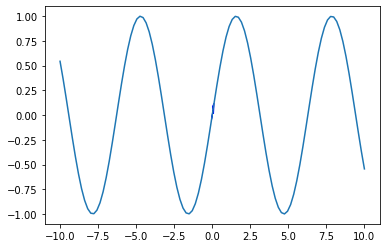

In [8]:
from filecmp import clear_cache
import matplotlib.pyplot as plt
import numpy as np

clear_cache()

def makeArrow(ax,pos, dx, function,direction):
    delta = 0.000001 if direction >= 0 else -0.000001
    dxHalf = dx/2
    startX = pos-dxHalf
    dy = function(pos+dxHalf) - function(startX) 
    ax.arrow(startX,function(startX),dx,dy,head_width=0.1,head_length=0.1,color = 'b')

def makeMoreArrow(ax, posStart, posEnd, function, direction):
    increment = (posEnd - posStart)/20
    for pos in np.arange(posStart, posEnd+increment, increment):
        makeArrow(ax, pos, increment, function, direction)

plt.figure
fun = np.sin
limits = [-10,10]
t = np.linspace(limits[0], limits[1], 100)
ax = plt.axes()
makeArrow(ax,0, 0.1,fun,+1)
plt.plot(t, fun(t))
#makeMoreArrow(ax,limits[0], limits[1],fun,+1)
plt.show
plt.show()

Data Analysis.ipynb Trash Codes

In [ ]:
def plttarget(targets, titles):
    ticksize = 15
    fsize = 16
    ''' To plot distributions of the target features'''
    '''To plot subplots for Syngas ratio, CH4 conversion and CO2 conversion'''
    '''
    plt.figure(figsize=(5,5))
    plt.hist(targets[0], bins=50)
    plt.xticks(fontsize= ticksize)
    plt.yticks(fontsize= ticksize)
    plt.ylabel("N",fontsize=fsize)
    #plt.xlabel("Syngas Ratio",fontsize=18)
    plt.title(titles[0],fontsize=fsize)
    plt.show()'''

    plt.figure(figsize=(5,5))
    plt.hist(targets[1], bins=50)
    plt.xticks(fontsize= ticksize)
    plt.yticks(fontsize= ticksize)
    plt.ylabel("N",fontsize=fsize)
    #plt.xlabel("$CH_{4}$ Conversion",fontsize=18)
    plt.title(titles[1],fontsize=fsize)
    plt.show()

    plt.figure(figsize=(5,5))
    plt.hist(targets[2], bins=50)
    plt.xticks(fontsize= ticksize)
    plt.yticks(fontsize= ticksize)
    plt.ylabel("N",fontsize=fsize)
    #plt.xlabel("$CO_{2}$ Conversion",fontsize=18)
    plt.title(titles[2],fontsize=fsize)
    #plt.tight_layout
    plt.show()

def pltCorrelation():
    pass
    '''
    # To plot heat map for only targets
    corr2 = df.iloc[:,-4:].corr() # 1:-3 to exclude name
    corr2.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)
    plt.figure()
    plt.title("Heat Map of covariance matrix for Targets", fontsize=15,weight='bold')
    sns.heatmap(corr2, xticklabels=corr2.columns.values, center=0,vmin=-1,yticklabels=corr2.columns.values, linewidths=.5, cmap="Spectral_r",annot=True, fmt=".2f")
    plt.show()

    # To plot heat map for both targets and features
    corr3 = df.iloc[:,1:].corr() # 1:-3 to exclude name
    corr3.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)
    plt.figure(figsize=(11.5,9))
    plt.title("Heat Map of covariance matrix for both features and targets", fontsize=24)
    sns.heatmap(corr3, xticklabels=corr3.columns.values, center=0,vmin=-1,yticklabels=corr3.columns.values, linewidths=.5, cmap="Spectral_r",annot=True, fmt=".2f")
    plt.show()'''

Syngas.ipynb Trash Codes

In [ ]:
def plthist(df, filterdf = True, disp = False):
    '''plot histograms of features values'''
    thres = 0.005
    upperq = 1-thres 
    df3 = df
    if filterdf:
        df3 = df3.loc[df["Pore Volume "] <= df["Pore Volume "].quantile(upperq)]
        df3 = df3.loc[df["GHSV"] <= df["GHSV"].quantile(upperq)]
        df3 = df3.loc[df["Modifier Electronegativity"] <= 2.5]
        df3 = df3.loc[df["Pore Size"] <= df["Pore Size"].quantile(upperq)]
        df3 = df3.loc[df["Ni Loading"] <= df["Ni Loading"].quantile(upperq)]
        df3 = df3.loc[df["Ni Particle Size (nm)"] <= df["Ni Particle Size (nm)"].quantile(upperq)]
        df3 = df3.loc[df["H2-TPR Peak Temperature"] >= 300]
    if disp:
        df3 = df3.loc[df["Ni Dispersion (%)"] <= 30]
    fig = df3.hist(bins=40, figsize=(10, 9))
    print(len(df3.index))
    fig = plt.gcf()
    fig.subplots_adjust(wspace=0.3, hspace=0.4)
    plt.show()

In [1]:
'''def average(*args):
    return sum(*args)/len(*args)
    
def plothist(arr):
    plt.figure()
    plt.hist(np.asarray(arr), bins=25)
    plt.show()

def meandict(d):
    res = 0 
    for val in d.values():
        res += val
    return res/len(d)

def analyze(d,a):
    print(d)
    print("The mean score of the dictionary: {}, and no. of score: {}".format(meandict(d), len(d)))
    plothist(a)
    print("The average score of the entire array is {}".format(np.average(a)))

def run(X,y, testrf=True):
    n = 100
    arr_rf, arr_gbr,arr_cat = [],[],[]
    d_rf, d_gbr, d_cat = {},{},{}
    threshold = 0.7
    for i in range(0,n):
        X_train, X_test, y_train, y_test = splitdata(X,y, i)
        # Test RF
        core1, rlst = rf(X_train, X_test, y_train, y_test)
        score1 = score1[1]
        arr_rf.append(score1)
        if score1 > threshold:
            d_rf[i] = score1

        # Test GBR

        score2, glst = gbr(X_train, X_test, y_train, y_test)
        score2 = score2[1]
        arr_gbr.append(score2)
        if score2 > threshold:
            d_gbr[i] = score2

        # test CAT
        score3, clst = cat(X_train, X_test, y_train, y_test)
        score3 = score3[1]
        arr_cat.append(score3)
        if score3 > threshold:
            d_cat[i] = score3
        
        #print(score1,score2, score3)
        
    #analyze(d_rf, arr_rf)
    #analyze(d_gbr, arr_gbr)
    analyze(d_cat, arr_cat)
    return arr_cat, arr_gbr, arr_cat, d_rf, d_gbr, d_cat

arrrf, arrgbr, arrcat, drf, dgbr, dcat = run(X,y)'''

'def average(*args):\n    return sum(*args)/len(*args)\n    \ndef plothist(arr):\n    plt.figure()\n    plt.hist(np.asarray(arr), bins=25)\n    plt.show()\n\ndef meandict(d):\n    res = 0 \n    for val in d.values():\n        res += val\n    return res/len(d)\n\ndef analyze(d,a):\n    print(d)\n    print("The mean score of the dictionary: {}, and no. of score: {}".format(meandict(d), len(d)))\n    plothist(a)\n    print("The average score of the entire array is {}".format(np.average(a)))\n\ndef run(X,y, testrf=True):\n    n = 100\n    arr_rf, arr_gbr,arr_cat = [],[],[]\n    d_rf, d_gbr, d_cat = {},{},{}\n    threshold = 0.7\n    for i in range(0,n):\n        X_train, X_test, y_train, y_test = splitdata(X,y, i)\n        # Test RF\n        core1, rlst = rf(X_train, X_test, y_train, y_test)\n        score1 = score1[1]\n        arr_rf.append(score1)\n        if score1 > threshold:\n            d_rf[i] = score1\n\n        # Test GBR\n\n        score2, glst = gbr(X_train, X_test, y_train, y_

In [ ]:
    '''
    for perc in frange:
        inputX = dfCopy # input features at mean value
        #print(inputX)
        inputX[str(feature)] = (perc) # input feature with the modified value
        #print(inputX[str(feature)])
        #print(inputX)
        partial_dependence(mdlX, features=[0], X=X, percentiles=(0.05, 0.95),grid_resolution=25)
        partial_dependence(mdlZ, features=[0], X=X, percentiles=(0.05, 0.95),grid_resolution=25)
        ch4conv.append(mdlX.predict(inputX).mean())
        #co2conv.append(mdlY.predict(inputX))
        syngas.append(mdlZ.predict(inputX).mean())
        '''

In [ ]:
# GridSearch
def gridsearch(model, Xtrain, ytrain):
    '''For hyperparameter optimization, change grid if required, e.g. 'n_estimators' '''
    grid = {'learning_rate' : [i for i in np.arange(0.01,0.5,0.01)]}
    grid_search_result = GridSearchCV(estimator=model, param_grid = grid, cv = 2, n_jobs=-1, verbose=0)
    grid_search_result.fit(Xtrain, ytrain)
    print("Best parameters from grid search: {}".format(grid_search_result.best_params_))
    print("Best Lowest RMSE: {}".format(grid_search_result.best_score_))
    return  grid_search_result


def plttree(model, rf=False):
    if rf:
        model = model.estimators_[0]
    global X
    plt.figure(figsize=(80,40))
    tree.plot_tree(model, feature_names=X.columns, filled =True, fontsize=12)
    plt.show()

def crossval(X,y, reg, name):
    cv = ShuffleSplit(test_size=0.1, n_splits = 10)
    cval_score = cross_val_score(reg, X, y, cv=cv, scoring="r2")
    print(f"The mean score from Shuffle-Split cross validation for the {name} model is {np.around(cval_score.mean(),decimals=3)} and the standard deviation is {np.around(cval_score.std(),decimals = 3)}")
    return cval_score

def crossvalAll(X,y):
    crossval(X,y, RandomForestRegressor(n_estimators=2000, max_depth=100,random_state=0) , "RF")
    crossval(X,y, GradientBoostingRegressor(n_estimators=1000, learning_rate=5e-3, subsample=0.7, max_depth = 10, random_state = 1) , "GBR")
    crossval(X,y, CatBoostRegressor(n_estimators= 1000, depth = 8, verbose=0) , "CatBoost")

#crossvalAll(X, y1) # -> For CH4 conversion
#crossvalAll(X, y2) # -> For CO2 conversion

In [ ]:
def crossval(X,y, reg, name, rs):
    cv = ShuffleSplit(test_size=0.1, n_splits = 10,  random_state=rs)
    #cv = KFold(n_splits=10, random_state=rs, shuffle=True)
    cval_score = cross_val_score(reg, X, y, cv=cv, scoring="r2")
    print(f"The mean score from Shuffle-Split cross validation for the {name} model is {np.around(cval_score.mean(),decimals=3)} and the standard deviation is {np.around(cval_score.std(),decimals = 3)}")
    return cval_score

def crossvalAll(X,y):
    #crossval(X,y, RandomForestRegressor(n_estimators=2000, max_depth=100,random_state=0) , "RF", 8)
    #crossval(X,y, GradientBoostingRegressor(n_estimators=1000, learning_rate=5e-3, subsample=0.7, max_depth = 10, random_state = 1) , "GBR", 8)
    for i in range(45,100):
        cs = crossval(X,y, CatBoostRegressor(n_estimators= 1000, depth = 9, verbose=0) , "CatBoost",i)
        if (cs.mean() > 0.81):
            print(f"The score is {cs.mean()} at randomn-state = {i}")

#crossvalAll(X, y) # -> For CH4 conversion

In [ ]:
def twod_pdp(model, Xtrain, feature_tuple, grid=40, low=0,up=0.95):
    plt.figure()
    fig = PartialDependenceDisplay.from_estimator(model,Xtrain, features = [feature_tuple], feature_names=X.columns,
    n_jobs=3, grid_resolution=grid, percentiles = (low,up), line_kw = {"linestyle":"--","linewidth":2, "marker":"o", "markersize":3})
    plt.show()
